In [1]:
##System Path
import os, sys
root = os.getcwd()
path =root+"/../../"
img_dir = root+"/img"
sys.path.append(path)

if(not os.path.exists(img_dir)):
    os.mkdir(img_dir)

In [2]:
#imports
import numpy as np
from ensembler.potentials import OneD as potentials1D
from ensembler.visualisation.plotPotentials import plot_1DPotential_Term

#phase space
positions = np.linspace(start=0, stop=11, num=1000)

#build potential
V = potentials1D.fourWellPotential(a=2,b=5, c=7, d=9)

#visualize
fig, outpath = plot_1DPotential_Term(potential=V, positions=positions, out_path=img_dir+"/four_well.png")



In [3]:
#Langevin integration simulation:
##imports
from ensembler.potentials.OneD import harmonicOscillatorPotential
from ensembler.integrator.stochastic import langevinIntegrator
from ensembler.system import system
from ensembler.visualisation.plotSimulations import static_sim_plots

##Simulation Setup
pot=harmonicOscillatorPotential()
integrator = langevinIntegrator(dt=0.1)
sys=system(potential=pot, integrator=integrator,  position=0,  temperature=300)

##simulate
cur_state = sys.simulate(steps=10000)

##visualize
fig, out_path = static_sim_plots(sys, title="Langevin Simulation", out_path=img_dir+"/langevine_simulation.png")


initializing Langevin old Positions	 



{'bodies': [<matplotlib.collections.PolyCollection object at 0x0000022C5E3A3A48>]}


# Free Energies

In [4]:

#but first some imports:

##System Path
import os, sys
path = os.getcwd()+"/.."
sys.path.append(path)

##basics
import numpy as np
from matplotlib import pyplot as plt

##Ensembler
from ensembler.analysis.freeEnergyCalculation import zwanzigEquation, threeStateZwanzigReweighting, bennetAcceptanceRatio

from ensembler.potentials import OneD as pot
from ensembler.integrator.stochastic import metropolisMonteCarloIntegrator
from ensembler.system.basic_system import system
from ensembler.system.perturbed_system import perturbedSystem
from ensembler.system.eds_system import edsSystem

from ensembler.visualisation.plotSimulations import static_sim_plots

#Benchmarking parameters
simulation_steps_total_per_approach = 100000
rand=0.1

In [5]:
#Build System
#System Parameters:
yoff1 = 0
xoff1 = 0
force_constant = k1 =0.5

entropic_difference = k2 = 1
potential_difference = yoff2 = 1
phase_space_distance = xoff2 = 2.5

#State Potentials
h1, h2 = pot.harmonicOscillatorPotential(k=k1, x_shift=xoff1, y_shift=yoff1), pot.harmonicOscillatorPotential(k=k2, x_shift=xoff2, y_shift=yoff2)



(<Figure size 432x288 with 1 Axes>, None)

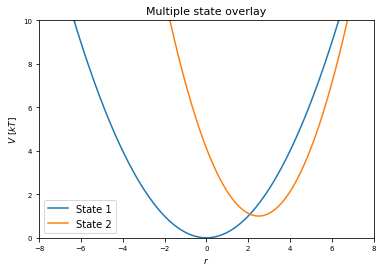

In [6]:
from ensembler.visualisation.plotPotentials import multiState_overlays

multiState_overlays([h1,h2])

Text(0.5, 1.0, 'Two state Potentials')

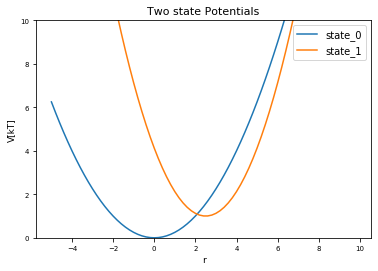

In [7]:

#Visualize
positions = np.arange(-5,10, 0.2)
ene =  h1.ene(positions)
plt.plot(positions,ene, label="state_0")

ene =  h2.ene(positions)
plt.plot(positions,ene, label="state_1")
    
plt.legend()
plt.ylim([0,10])
plt.ylabel("V[kT]")
plt.xlabel("r")
plt.title("Two state Potentials")